https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats 


## One-Sample T-Test

A one-sample t-test checks whether a sample mean differs from the population mean

In [2]:
np.random.seed(6)
#data
pop_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
pop_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
pop_ages = np.concatenate((pop_ages1, pop_ages2))

#sample 
sample1 = stats.poisson.rvs(loc=18, mu=30, size=30)
sample2 = stats.poisson.rvs(loc=18, mu=10, size=20)
sample = np.concatenate((sample1, sample2))

print( pop_ages.mean())
print( sample.mean())

43.000112
39.26


 Null hypothesis the sample comes from the same distribution as the population, with 95% confidence.

In [3]:
stats.ttest_1samp(a = sample, popmean = pop_ages.mean())  

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

In [4]:
stats.t.ppf(q=0.025,df=49)  # Degrees of freedom

-2.0095752344892093

In [5]:
#same as p-vale
stats.t.cdf(x= -2.5742,df= 49) * 2   # Multiply by two for two tailed test *


0.013121066545690117

 there is a 1.3% chance of seeing a result this extreme due to chance, therefore the 95% confidence null hypotesis can be rejected.

## Two-Sample T-Test
A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means.


In [6]:
np.random.seed(12)
sample2_1 = stats.poisson.rvs(loc=18, mu=33, size=30)
sample2_2 = stats.poisson.rvs(loc=18, mu=13, size=20)
sample2 = np.concatenate((sample2_1, sample2_2))

print( sample2.mean() )

42.8


In [7]:
stats.ttest_ind(a= sample,b= sample2, equal_var=False)    # perform Welch’s t-test, 
                                                          #which does not assume equal population variance 

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

## Kolmogorov-Smirnov test for goodness of fit.
This test compares the underlying continuous distributions F(x) and G(x) of two independent samples.

There are three options for the null and corresponding alternative hypothesis that can be selected using the alternative parameter.

two-sided: The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.

less: The null hypothesis is that F(x) >= G(x) for all x; the alternative is that F(x) < G(x) for at least one x.

greater: The null hypothesis is that F(x) <= G(x) for all x; the alternative is that F(x) > G(x) for at least one x.

If the KS statistic is small or the p-value is high, then we cannot reject the null hypothesis in favor of the alternative.

In [15]:

rvs1 = stats.norm.rvs(size=10000, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=10000, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)


KstestResult(statistic=0.2156, pvalue=6.964726128273455e-204)

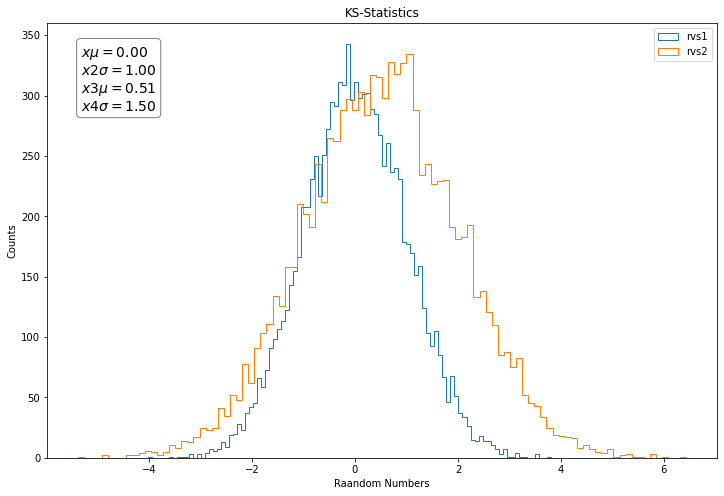

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(rvs1,bins=100,histtype='step',label ='rvs1')
ax.hist(rvs2,bins=100,histtype='step',label ='rvs2')
ax.set(xlabel='Raandom Numbers', ylabel = 'Counts', title= 'KS-Statistics')
textstr = '\n'.join((
    r'$x\mu=%.2f$' % (rvs1.mean(), ),
    r'$x2\sigma=%.2f$' % (rvs1.std(), ),
    r'$x3\mu=%.2f$' % (rvs2.mean(), ),
    r'$x4\sigma=%.2f$' % (rvs2.std(), )))

    
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend()
plt.show()